In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("data_flats.csv",sep=';')
data.tail()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
30464,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,0.325885,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,7400000
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.540003,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,25000000
30466,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,1.806570,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,6970959
30467,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.108672,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,13500000
30468,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,0.224601,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,5600000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [4]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13652 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     13652 non-null  int64  
 1   full_sq                                13652 non-null  int64  
 2   life_sq                                13652 non-null  float64
 3   floor                                  13652 non-null  float64
 4   sub_area                               13652 non-null  object 
 5   preschool_quota                        13652 non-null  float64
 6   preschool_education_centers_raion      13652 non-null  int64  
 7   school_quota                           13652 non-null  float64
 8   school_education_centers_raion         13652 non-null  int64  
 9   school_education_centers_top_20_raion  13652 non-null  int64  
 10  hospital_beds_raion                    13652 non-null  float64
 11  he

In [5]:
data.sub_area.value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Mihajlovo-Jarcevskoe       1
Poselenie Klenovskoe                 1
Name: sub_area, Length: 146, dtype: int64

<AxesSubplot:xlabel='sub_area', ylabel='price_doc'>

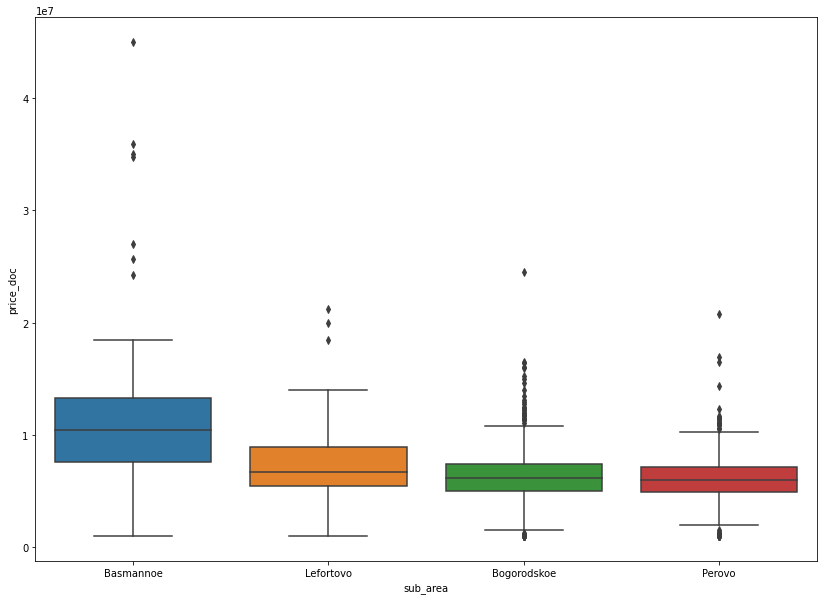

In [24]:
plt.figure(figsize=(14,10))
sns.boxplot(x=data[data.sub_area.isin(['Lefortovo','Perovo','Basmannoe','Bogorodskoe'])].sub_area, \
           y=data.price_doc)

Ранее мы уже выяснили, что данные о квартирах не все числовые. Есть и признаки, которые содержат текстовые значения : ординальный (уровень экологии) и категориальный (район). Нам обязательно нужно перекодировать эти признаки, так как иначе мы не сможем в дальнейшем работать с этим датасетом и применять на нем какие-то математические алгоритмы. 

Ординальный признак мы можем перекодировать в числовой довольно простым способом: просто заменить каждое значение на число (4 - 'excellent', 3 - 'good' etc.).

Для этого необходимо:

 создать словарь, сопоставляющий числовые значения от 0 до 4 описанию экологии от 'no data' до 'excellent' соответственно
 заменить значения в колонке ecology на заданные нами выше с помощью метода .replace :
data.ecology = data.ecology.replace(to_replace=ecology_dict)
Теперь необходимо разобраться с переменной, содержащей информацию о районе.  Для этого воспользуйтесь методом get_dummies

In [25]:
data.ecology.value_counts()

poor            8017
no data         7656
good            7173
excellent       3938
satisfactory    3685
Name: ecology, dtype: int64

In [26]:
ecology_dict = {'poor': 1,
                'no data': 0,
                'good': 3,
                'excellent': 4,
                'satisfactory': 2}

In [27]:
data.ecology = data.ecology.replace(to_replace = ecology_dict)

In [28]:
data.ecology.value_counts()

1    8017
0    7656
3    7173
4    3938
2    3685
Name: ecology, dtype: int64

In [33]:
data.ecology.mean()

1.7282483836030063

In [29]:
data.sub_area.value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Mihajlovo-Jarcevskoe       1
Poselenie Klenovskoe                 1
Name: sub_area, Length: 146, dtype: int64

In [30]:
pd.get_dummies(data.sub_area)

,Ajeroport,Akademicheskoe,Alekseevskoe,Altuf'evskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,...,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
data = pd.concat([data, pd.get_dummies(data.sub_area)], axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Columns: 202 entries, id to Zjuzino
dtypes: float64(41), int64(14), object(1), uint8(146)
memory usage: 17.3+ MB
